<a href="https://colab.research.google.com/github/iam-ajitkumartoppo/customer_segmentation/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="color:white;background-color:#3cb371"> Online Retail Customer Segmentation</h2>

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

<h4>Columns description</h4>

<h6>InvoiceNo:</h6>A unique identifier for the invoice. An invoice number shared across rows means that those transactions were performed in a single invoice (multiple purchases).<br>
<h6>StockCode: </h6>Identifier for items contained in an invoice.<br>
<h6>Description:</h6> Textual description of each of the stock items.<br>
<h6>Quantity:</h6> The quantity of the item purchased.<br>
<h6>InvoiceDate:</h6> Date of purchase.<br>
<h6>UnitPrice:</h6> Value of each item.<br>
<h6>CustomerID: </h6>Identifier for customer making the purchase.<br>
<h6>Country:</h6> Country of customer.<br>

In [ ]:
#importing python module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#loading the dataset
df = pd.read_csv("Online Retail.csv")

In [ ]:
#to display the first four rows of the dataset
df.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
#to display the last four rows of dataset
df.tail(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [ ]:
#to display the number of rows and columns
df.shape

(541909, 8)

In [ ]:
#display all columns name
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#to display informaton about columns present 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#display the null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are missing value we will remove these missing values.

In [ ]:
#removing the missing vaues
df.dropna(inplace=True)

In [ ]:
#to check null vaues 
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#to check the number of rows and columns after removing the null values 
df.shape

(406829, 8)

In [ ]:
pd.DataFrame([{'customers': len(df['CustomerID'].value_counts()),
               'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),  
              }], columns = ['customers', 'products', 'transactions'], index = ['quantity'])

,customers,products,transactions
quantity,4372,3684,22190


It can be seen that the dataset has 4372 unique customer records,3684 unique products. The total number of unique transactions present is 22,190.

In [ ]:
#to check the number of purchase recoreds from different countries
df.Country.value_counts()             

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

Most of the customers in the data are from the United Kingdom. Customer clusters vary by geography, so here we’ll restrict the data to the United Kingdom only.

In [ ]:
#for segmentation we will consider only those customers who are from United Kingdom
df_uk = df[df['Country']=='United Kingdom']
#check the shape of new dataset
df_uk.shape

(361878, 8)

In [ ]:
# to compute and display summary statistics 
df_uk.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


we can observe from table above there are -ve values in Quantity. Because quantity cannot be -ve 
for purchase done by customers we will delete all the rows that contains negative values.

In [ ]:
#removing all rows that contains -ve quantity
df_uk = df_uk[df_uk['Quantity']>0]
df_uk.shape

(354345, 8)

In [ ]:
#restricting the data to one full year because it's better to use a metric per Months or Years in RFM
df_uk = df_uk[df_uk['InvoiceDate']>= "2010-12-09"]
df_uk.shape

(176137, 8)

In [ ]:
#to print the number of unique values in coumns 
print('Unique number of customer ID present in data-',df_uk.CustomerID.nunique())
print('Unique number of Quantity present in data-',df_uk.Quantity.nunique())
print('Unique number of StockCode present in data-',df_uk.StockCode.nunique())
print('Unique number of Description present in data-',df_uk.Description.nunique())
print('Unique number of InvoiceNo present in data-',df_uk.InvoiceNo.nunique()) 
print('Unique number of InvoiceDate present in data-',df_uk.InvoiceDate.nunique())
print('Unique number of Country present in data-',df_uk.Country.nunique())
print('Unique number of UnitPrice present in data-',df_uk.UnitPrice.nunique())

Unique number of customer ID present in data- 2864
Unique number of Quantity present in data- 235
Unique number of StockCode present in data- 3294
Unique number of Description present in data- 3403
Unique number of InvoiceNo present in data- 8789
Unique number of InvoiceDate present in data- 8285
Unique number of Country present in data- 1
Unique number of UnitPrice present in data- 301


In [ ]:
#creating a new coumn date which contains the dates of transaction officially recorded.
df_uk['date'] = pd.DatetimeIndex(df_uk['InvoiceDate']).date

In [ ]:
#displaying our dataset
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
105335,545220,21955,DOORMAT UNION JACK GUNS AND ROSES,2,3/1/11 8:30,7.95,14620.0,United Kingdom,2011-03-01
105336,545220,48194,DOORMAT HEARTS,2,3/1/11 8:30,7.95,14620.0,United Kingdom,2011-03-01
105337,545220,22556,PLASTERS IN TIN CIRCUS PARADE,12,3/1/11 8:30,1.65,14620.0,United Kingdom,2011-03-01
105338,545220,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,3/1/11 8:30,4.95,14620.0,United Kingdom,2011-03-01
105339,545220,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,3/1/11 8:30,3.75,14620.0,United Kingdom,2011-03-01
...,...,...,...,...,...,...,...,...,...
370675,569148,22113,GREY HEART HOT WATER BOTTLE,4,9/30/11 15:52,4.25,16613.0,United Kingdom,2011-09-30
370676,569148,84030E,ENGLISH ROSE HOT WATER BOTTLE,4,9/30/11 15:52,4.25,16613.0,United Kingdom,2011-09-30
370677,569148,22867,HAND WARMER BIRD DESIGN,12,9/30/11 15:52,2.10,16613.0,United Kingdom,2011-09-30
370678,569148,23439,HAND WARMER RED LOVE HEART,12,9/30/11 15:52,2.10,16613.0,United Kingdom,2011-09-30


<h3>RFM</h3>
Recency, frequency, monetary value is a marketing analysis tool used to classify a company’s or an organization’s best customers by measuring and analyzing spending habits. Here we will be using RFM technique to do the customer segmentation

<h5>Recency:</h5> How recently a customer has made a purchase<br>
<h5>Frequency:</h5> How often a customer makes a purchase<br>
<h5>Monetary Value:</h5> How much money a customer spends on purchases


<h3>recency</h3>

In [ ]:
#to get the last date of transaction available in data 
df_uk['date'].max()

datetime.date(2011, 9, 30)

In [ ]:
#to get the oldest date of transaction available in data
df_uk['date'].min()

datetime.date(2011, 3, 1)

In [ ]:
#display the columns customer id and their last purchase date
df_recency = df_uk.groupby(by='CustomerID', as_index=False)['date'].max()
df_recency.columns = ['CustomerID','LastPurshaceDate']
df_recency.head()

,CustomerID,LastPurshaceDate
0,12747.0,2011-08-22
1,12748.0,2011-09-30
2,12749.0,2011-08-01
3,12820.0,2011-09-26
4,12821.0,2011-05-09


In [ ]:
#Importing the datetime module
import datetime as dt

In [ ]:
#assigning today as the latest date of transaction
today = dt.date(2011,12,9)
print(today)

2011-12-09


In [ ]:
#to calculate how recently a customer purchased 
df_recency['Recency'] = df_recency['LastPurshaceDate'].apply(lambda x: (today - x).days)
df_recency.head()

,CustomerID,LastPurshaceDate,Recency
0,12747.0,2011-08-22,109
1,12748.0,2011-09-30,70
2,12749.0,2011-08-01,130
3,12820.0,2011-09-26,74
4,12821.0,2011-05-09,214


In [ ]:
#deleting the last purchase date  columnn
df_recency.drop('LastPurshaceDate',axis=1,inplace=True)

In [ ]:
#recency of each customer id last purchase
df_recency.head()

,CustomerID,Recency
0,12747.0,109
1,12748.0,70
2,12749.0,130
3,12820.0,74
4,12821.0,214


<h3>Frequency

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# drop duplicates
df_uk_copy = df_uk
df_uk_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
# calculate frequency of purchases
df_frequency = df_uk_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
df_frequency.columns = ['CustomerID','Frequency']
df_frequency.head()

,CustomerID,Frequency
0,12747.0,5
1,12748.0,96
2,12749.0,3
3,12820.0,1
4,12821.0,1


<h3>monetary

In [ ]:
#create column total cost to calculate to total amount spend
df_uk['TotalCost'] = df_uk['Quantity'] * df_uk['UnitPrice']

In [ ]:
#to calculate total amount of purchase done by a given customer id
df_monetary = df_uk.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
#to create a dataframe with columns customer id and monetary 
df_monetary.columns = ['CustomerID','Monetary']
#display total anoumt of purchase done by each id  
df_monetary.head()

,CustomerID,Monetary
0,12747.0,191.85
1,12748.0,1054.43
2,12749.0,67.00
3,12820.0,15.00
4,12821.0,19.92


<H3>RFM

In [ ]:
#merging columns recency frequency and monetary into one dataframe 
df_sample = df_recency.merge(df_frequency,on='CustomerID')
df_rfm = df_sample.merge(df_monetary,on='CustomerID')
df_rfm.set_index('CustomerID',inplace=True)
df_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747.0,109,5,191.85
12748.0,70,96,1054.43
12749.0,130,3,67.00
12820.0,74,1,15.00
12821.0,214,1,19.92


In [ ]:
#checking shape of above RFM data
df_rfm.shape

(2864, 3)

<h3>segmentation</h3


In [ ]:
#to display summary statistics of RFM data
df_rfm.describe()

,Recency,Frequency,Monetary
count,2864.000000,2864.000000,2864.000000
mean,138.352304,3.068785,173.826851
std,61.908018,4.445087,1160.922425
min,70.000000,1.000000,0.210000
25%,85.000000,1.000000,16.350000
50%,119.000000,2.000000,35.400000
75%,183.000000,3.000000,92.420000
max,283.000000,96.000000,39916.500000


In [ ]:
quantiles = df_rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,85.0,1.0,16.35
0.50,119.0,2.0,35.40
0.75,183.0,3.0,92.42


in above table we divided the columns recency frequency and monetary into four parts 
0-25%,25-50%,50-75%,75-100%

In [ ]:
quantiles.to_dict()

{'Recency': {0.25: 85.0, 0.5: 119.0, 0.75: 183.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'Monetary': {0.25: 16.35, 0.5: 35.400000000000006, 0.75: 92.42}}

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
rfm_segmentation = df_rfm
#assigning values to recency frequency and monetary based on whether they lie between 0-25%,25-50% ,50-75%,75-100%
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [ ]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12747.0,109,5,191.85,3,4,4
12748.0,70,96,1054.43,4,4,4
12749.0,130,3,67.00,2,3,3
12820.0,74,1,15.00,4,1,1
12821.0,214,1,19.92,1,1,2


In [ ]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12747.0,109,5,191.85,3,4,4,344
12748.0,70,96,1054.43,4,4,4,444
12749.0,130,3,67.00,2,3,3,233
12820.0,74,1,15.00,4,1,1,411
12821.0,214,1,19.92,1,1,2,112


In [ ]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  218
Loyal Customers:  687
Big Spenders:  716
Almost Lost:  52
Lost Customers:  5
Lost Cheap Customers:  278


In [ ]:
#dispaying customer id of top 10 customers
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
18102.0,72,34,26632.62,4,4,4,444
17949.0,70,32,22504.73,4,4,4,444
17450.0,70,28,18009.06,4,4,4,444
16029.0,80,39,15119.49,4,4,4,444
16013.0,70,24,10402.34,4,4,4,444
12901.0,81,20,5915.66,4,4,4,444
13798.0,72,34,4648.80,4,4,4,444
17857.0,72,12,4644.68,4,4,4,444
13694.0,71,32,4472.68,4,4,4,444


In [ ]:
df_rfm

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12747.0,109,5,191.85,3,4,4,344
12748.0,70,96,1054.43,4,4,4,444
12749.0,130,3,67.00,2,3,3,233
12820.0,74,1,15.00,4,1,1,411
12821.0,214,1,19.92,1,1,2,112
...,...,...,...,...,...,...,...
18280.0,277,1,23.70,1,1,2,112
18281.0,180,1,5.04,2,1,1,211
18282.0,126,1,12.75,2,1,1,211


<h5>Preprocessing the data for clustering</h5>

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

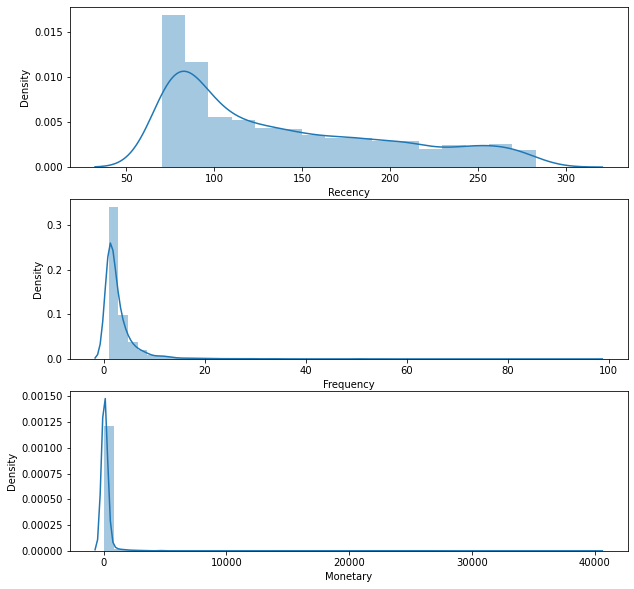

In [ ]:
#Checking the distribution of values in Recency, Frequency and Monetary variable
plt.figure(figsize=(10,10))
plt.subplot(3,1,1);sns.distplot(df_rfm['Recency'])
plt.subplot(3,1,2);sns.distplot(df_rfm['Frequency'])
plt.subplot(3,1,3);sns.distplot(df_rfm['Monetary'])

From above graphs we can see the data is right skewed which needs to be treated before applying model

In [ ]:
df = df_rfm.drop(['R_Quartile','F_Quartile','M_Quartile','RFMScore'], axis = 1)

In [ ]:
df

,Recency,Frequency,Monetary
CustomerID,,,
12747.0,109,5,191.85
12748.0,70,96,1054.43
12749.0,130,3,67.00
12820.0,74,1,15.00
12821.0,214,1,19.92
...,...,...,...
18280.0,277,1,23.70
18281.0,180,1,5.04
18282.0,126,1,12.75


<AxesSubplot:>

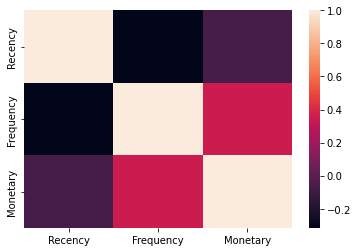

In [ ]:
#to plot the correlation between recency, frequency and monitory
sns.heatmap(df.corr())

We observe a Recency has negative correlation with Frequency and Monetary.
There is littile correlation between monetary and frequency.

In [ ]:
#applying log transformation to treat skewed data present
a= np.log(df['Recency'])
b= np.log(df['Frequency'])
c= np.log(df['Monetary'])

In [ ]:
#creating dataframe
df_log = pd.DataFrame({'Recency':a,'Frequency':b,'Monetary':c})
df_log

,Recency,Frequency,Monetary
CustomerID,,,
12747.0,4.691348,1.609438,5.256714
12748.0,4.248495,4.564348,6.960756
12749.0,4.867534,1.098612,4.204693
12820.0,4.304065,0.000000,2.708050
12821.0,5.365976,0.000000,2.991724
...,...,...,...
18280.0,5.624018,0.000000,3.165475
18281.0,5.192957,0.000000,1.617406
18282.0,4.836282,0.000000,2.545531


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

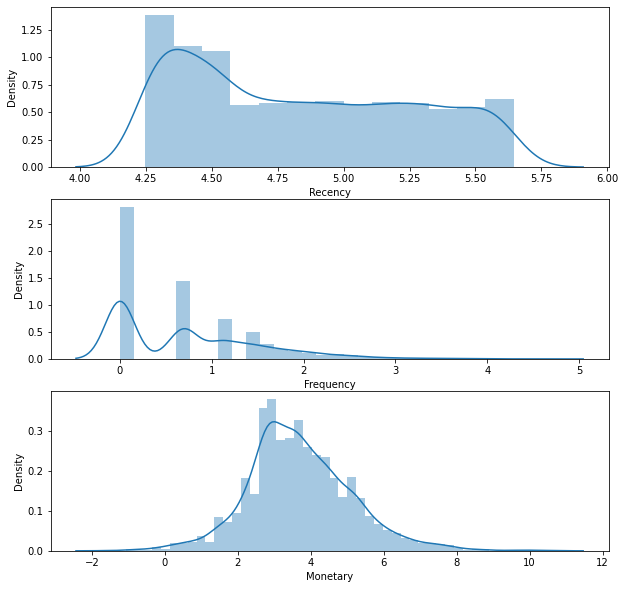

In [ ]:
#Checking the distribution of values in Recency, Frequency and Monetary variable after applying log transformation
plt.figure(figsize=(10,10))
plt.subplot(3,1,1);sns.distplot(df_log['Recency'])
plt.subplot(3,1,2);sns.distplot(df_log['Frequency'])
plt.subplot(3,1,3);sns.distplot(df_log['Monetary'])

After applying log transformation we see Recency and Monetary have better distributon, more normalized. But this is not the case for Frequency which has improved little only.

In [ ]:
#importing k-Means
from sklearn.cluster import KMeans

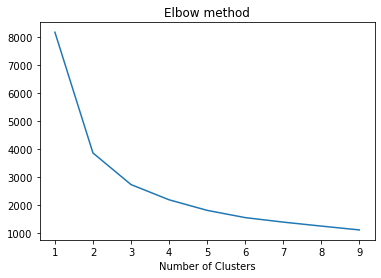

In [ ]:
#plotting elbow curve to find the suitable number of cluster
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(df_log) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('')
plt.show()

From the above elbow method we see that the optimal number of cluster is 2 or 3.<br>
we will also use silhouette method to find the suitable number of cluster.

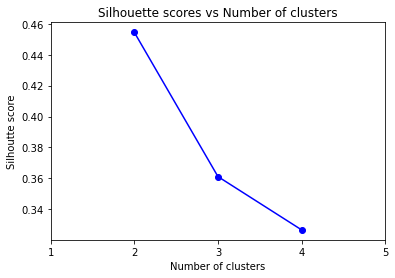

In [ ]:
from sklearn.metrics import silhouette_score
##plotting silhouette score vs number of clusters
silhoutte_scores = [silhouette_score(df_log, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([1, 2, 3, 4, 5])
plt.title('Silhouette scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

From the above graph we find silhouette score is highest for the value of k=2

In [ ]:
#finallly using k means model with k =2
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(df_log)

KMeans(n_clusters=2, random_state=1)

In [ ]:
df_log

,Recency,Frequency,Monetary
CustomerID,,,
12747.0,4.691348,1.609438,5.256714
12748.0,4.248495,4.564348,6.960756
12749.0,4.867534,1.098612,4.204693
12820.0,4.304065,0.000000,2.708050
12821.0,5.365976,0.000000,2.991724
...,...,...,...
18280.0,5.624018,0.000000,3.165475
18281.0,5.192957,0.000000,1.617406
18282.0,4.836282,0.000000,2.545531


In [ ]:
#assigning the labels
df_log['cluster_id'] = kmeans.labels_
df_log

,Recency,Frequency,Monetary,cluster_id
CustomerID,,,,
12747.0,4.691348,1.609438,5.256714,0
12748.0,4.248495,4.564348,6.960756,0
12749.0,4.867534,1.098612,4.204693,0
12820.0,4.304065,0.000000,2.708050,1
12821.0,5.365976,0.000000,2.991724,1
...,...,...,...,...
18280.0,5.624018,0.000000,3.165475,1
18281.0,5.192957,0.000000,1.617406,1
18282.0,4.836282,0.000000,2.545531,1


In [ ]:
df_log['cluster_id'].value_counts()

1    1764
0    1100
Name: cluster_id, dtype: int64

The model classified CustomerID into two clusters 1100 are in the cluster_id 0 and 1764 are in cluster id 1.

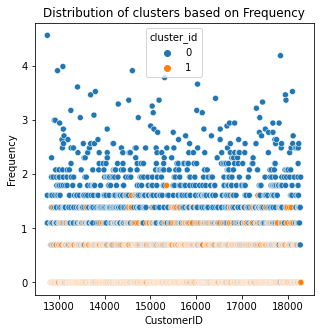

In [ ]:
#plotting graph to classify customerID into cluster based on frequency
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_log, x='CustomerID', y='Frequency', hue='cluster_id')
plt.title('Distribution of clusters based on Frequency')
plt.show()

we see from above graph customerID with low buying frequency are placed in cluster_id 1 and customerID with high frequency beong to cluster 0

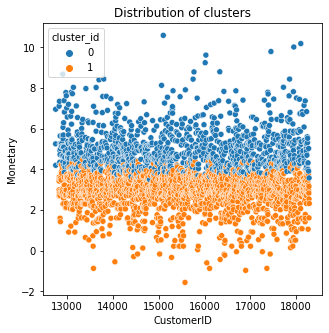

In [ ]:
#plotting graph to classify customerID into cluster based on Monetary
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_log, x='CustomerID', y='Monetary', hue='cluster_id')
plt.title('Distribution of clusters')
plt.show()

customerID with low monetary value are placed in cluster_id 1 and customerID with high monetary value are pllaced in cluster_id 0

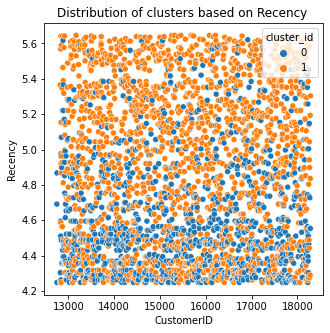

In [ ]:
#plotting graph to classify customerID into cluster based on Recency
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_log, x='CustomerID', y='Recency', hue='cluster_id')
plt.title('Distribution of clusters based on Recency ')
plt.show()

There is no clear distinction between cluster based on recency but still customers with low recency are grouped towards both cluster_id 0 & 1  where as customer with high recency are more grouped in cluster_id 1

From all the graph we see the k-means has created two clusters for CustomerID 0 and 1.<br>
Customers with relatively high frequency of buying, high monetary value who purchased recently are grouped in cluster 0.
Customers with relatively low frequency of buying, low monetary value some of them purchased recently while for some its relatively long time are placed in cluster 1.